In [38]:
import sys
import importlib
sys.path.append("/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/")
import python.utils as ut

import os
import numpy as np
import arviz as az
from numpy.polynomial.legendre import legvander
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import json
import glob
from scipy.stats import norm, cauchy, mode, t
from cmdstanpy import from_csv
import seaborn as sns
from tqdm import tqdm
import corner
import json

plt.style.use('seaborn-v0_8')

In [2]:
outputs = glob.glob("../stan/stan_out/legendre-20251012152101_*.csv")

fit = from_csv(outputs)

                          Mean      MCSE     StdDev        MAD             5%  \
lp__            -393077.000000  0.081325   3.348320   2.965200 -393083.000000   
theta_clean[1]        0.983760  0.000017   0.001180   0.001196       0.981871   
theta_clean[2]        0.014655  0.000017   0.001159   0.001147       0.012808   
theta_clean[3]        0.001585  0.000004   0.000328   0.000323       0.001084   
theta_rising[1]       0.856168  0.000180   0.012760   0.012803       0.834592   
...                        ...       ...        ...        ...            ...   
viterbi[21762]        1.000000       NaN   0.000000   0.000000       1.000000   
viterbi[21763]        1.000000       NaN   0.000000   0.000000       1.000000   
viterbi[21764]        1.000000       NaN   0.000000   0.000000       1.000000   
viterbi[21765]        1.000000       NaN   0.000000   0.000000       1.000000   
log_p_state      -18332.000000  0.665048  45.286100  44.922800  -18407.300000   

                           

In [3]:
print(fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



In [23]:
# Load JSON data

with open(
    "/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/data/json/legendre_semisupervised.json",
    "r"
) as f:
    data_dict = json.load(f)

In [39]:
# Convert to arviz inference data object
importlib.reload(ut)

idata = ut.build_idata(data_dict, fit)

/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/python/utils.py:269: SyntaxWarning: invalid escape sequence '\s'
  linestyle='--', color=sns.color_palette()[1],


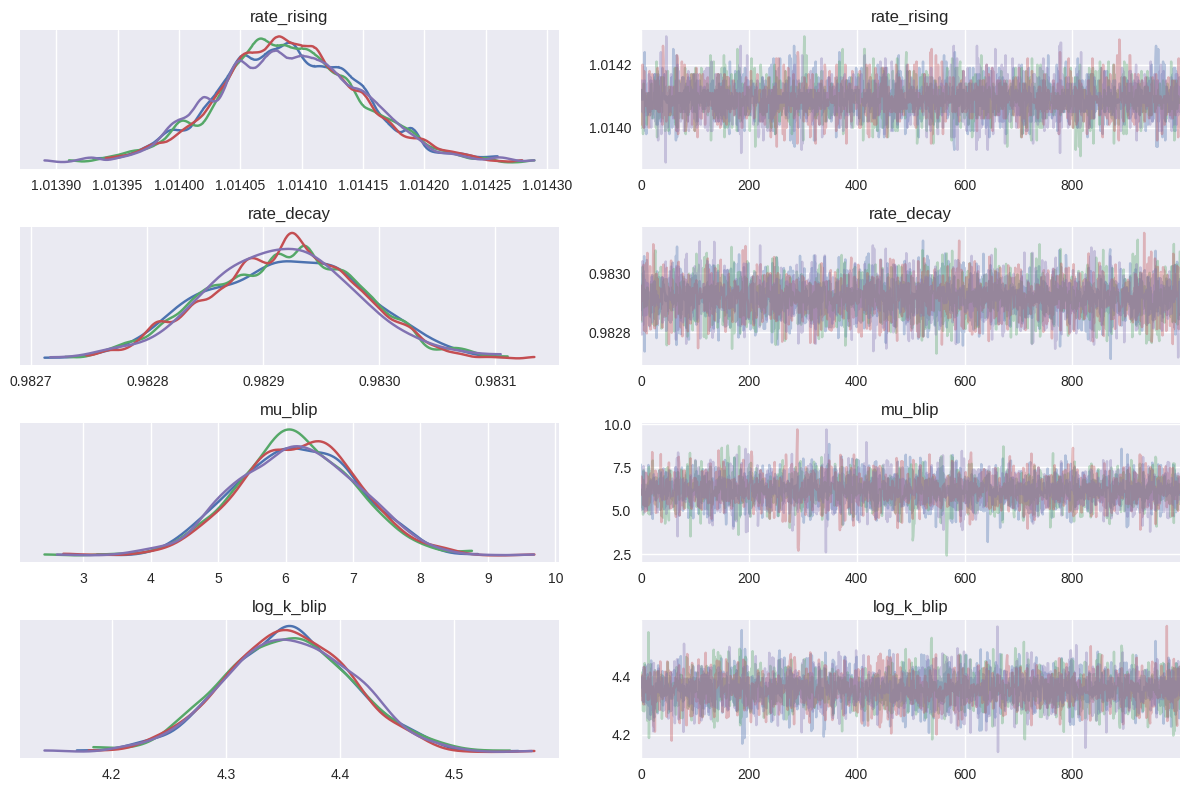

In [49]:
# az.summary(idata, var_names=["rate_rising","rate_decay","mu_blip","log_k_blip","X"])
az.plot_trace(
    idata,
    var_names=["rate_rising", "rate_decay", "mu_blip", "log_k_blip"],
    compact=False,
    combined=False,
)
plt.tight_layout(pad=1.0)
plt.show()

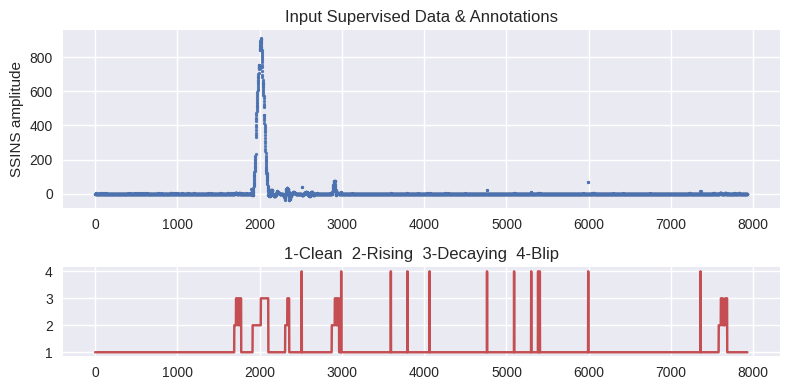

In [24]:
ut.plot_supervised_inputs(data_dict)

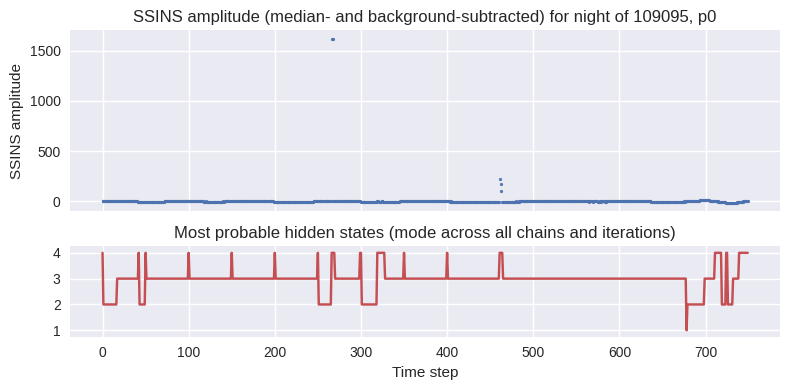

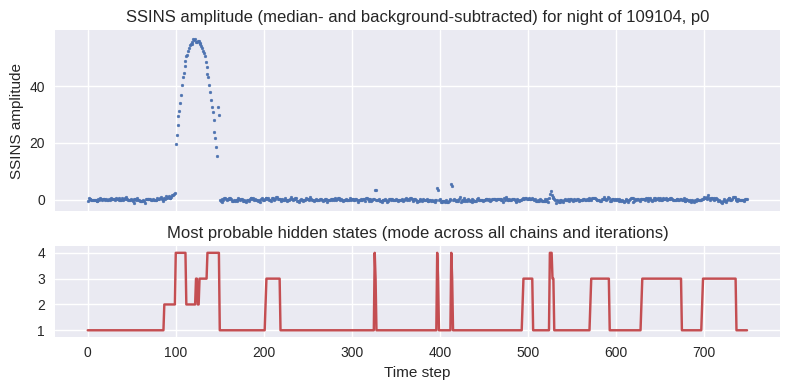

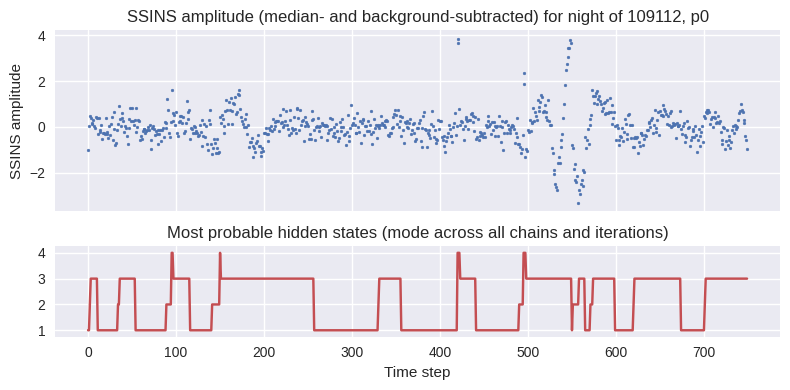

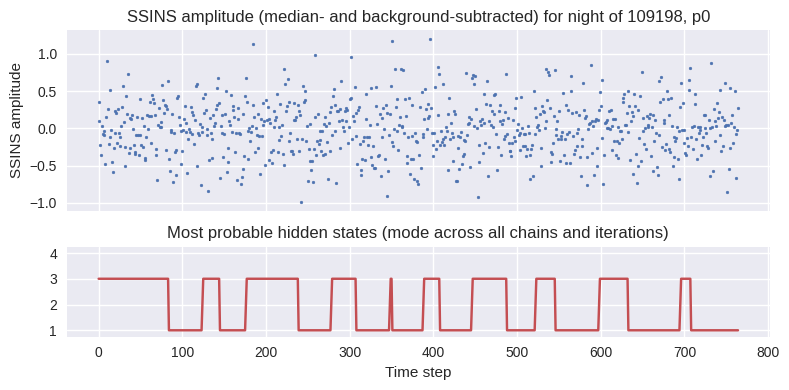

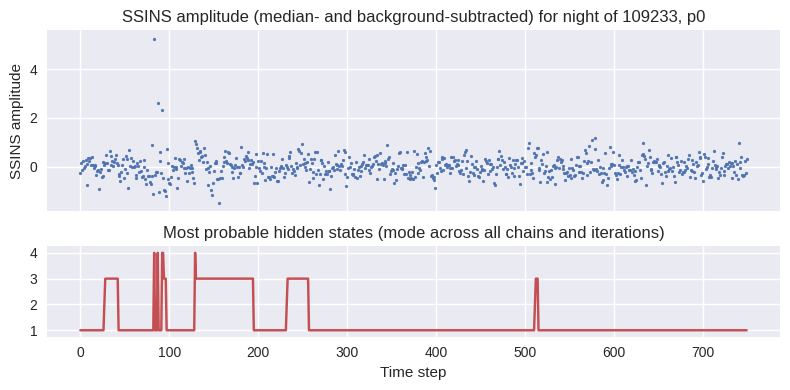

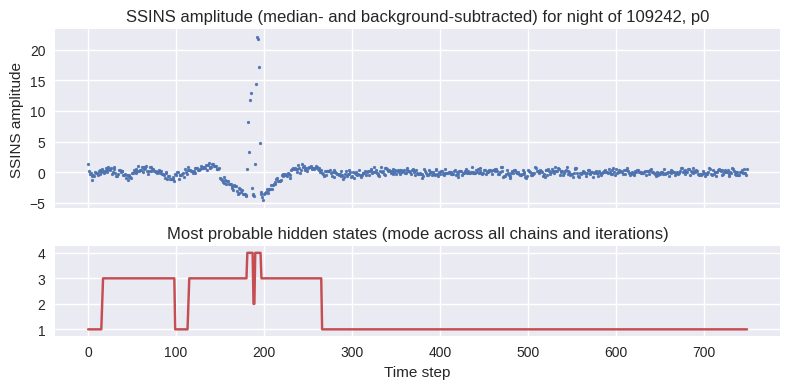

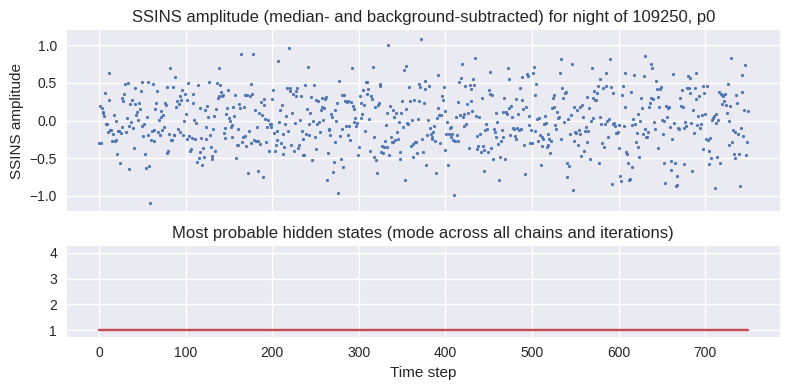

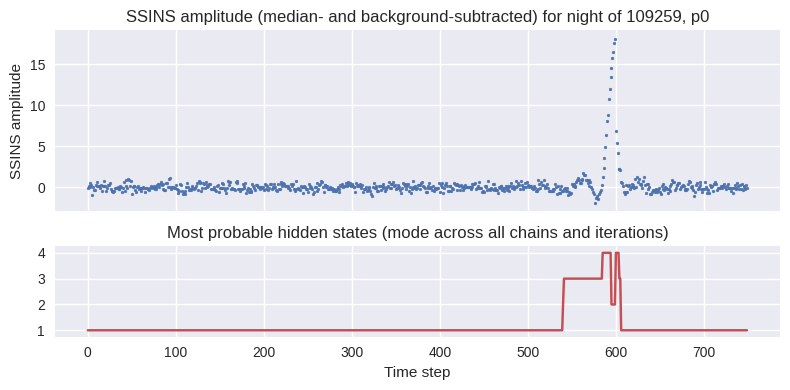

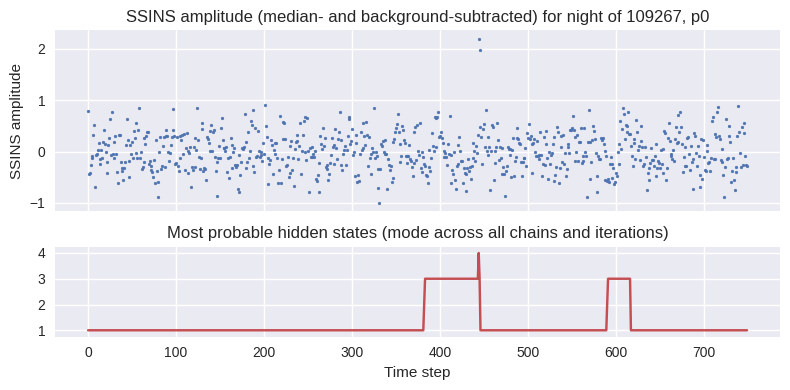

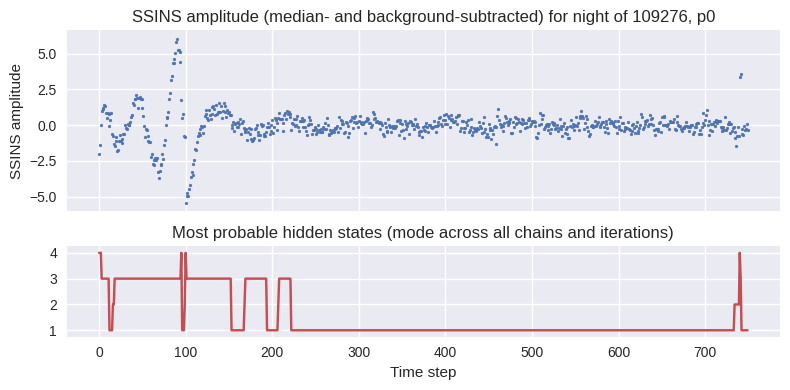

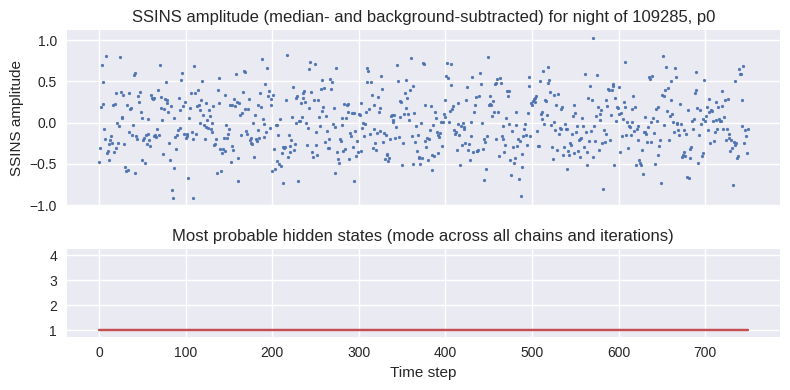

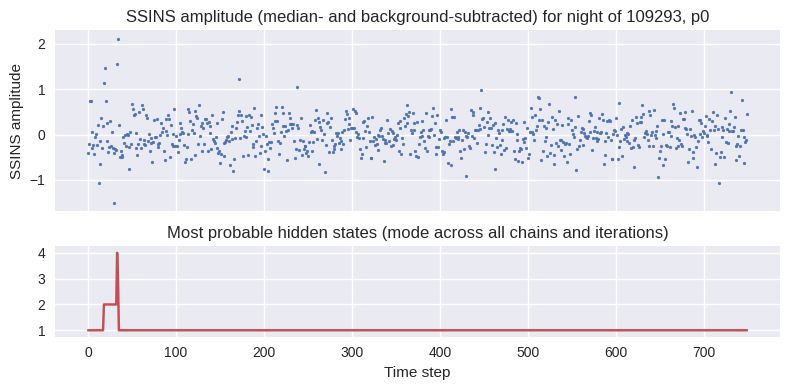

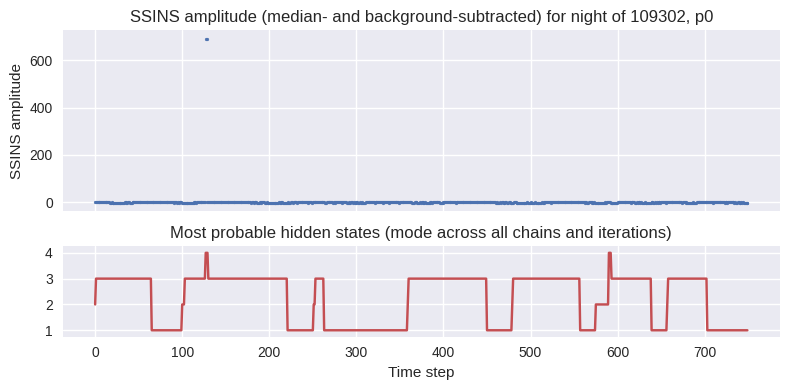

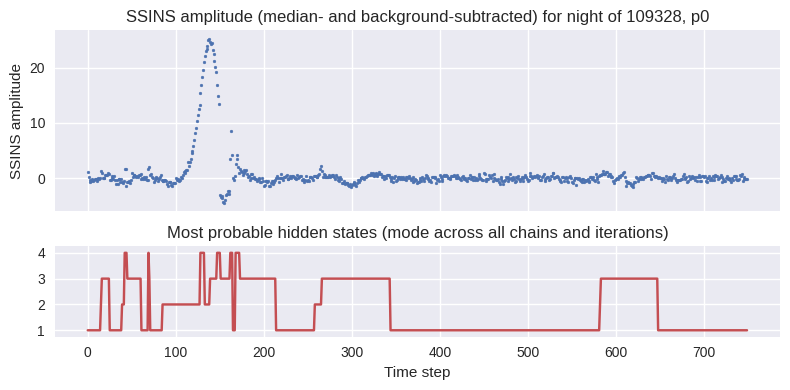

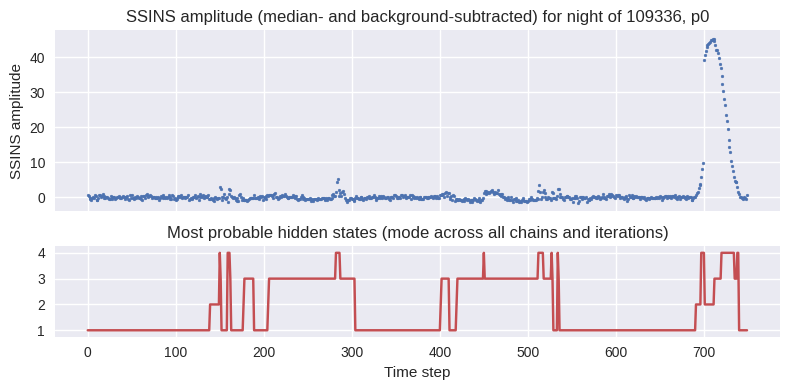

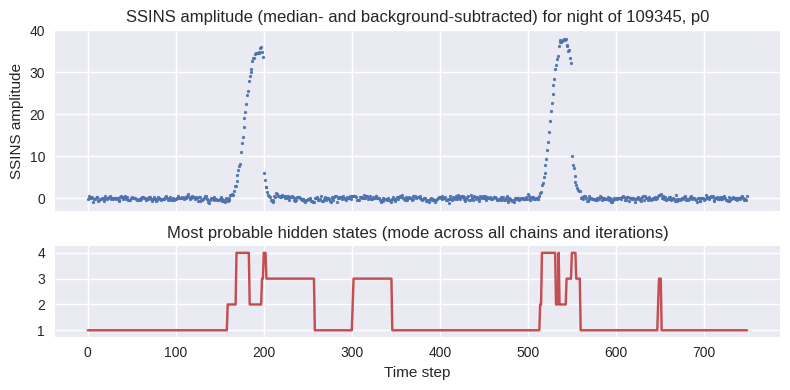

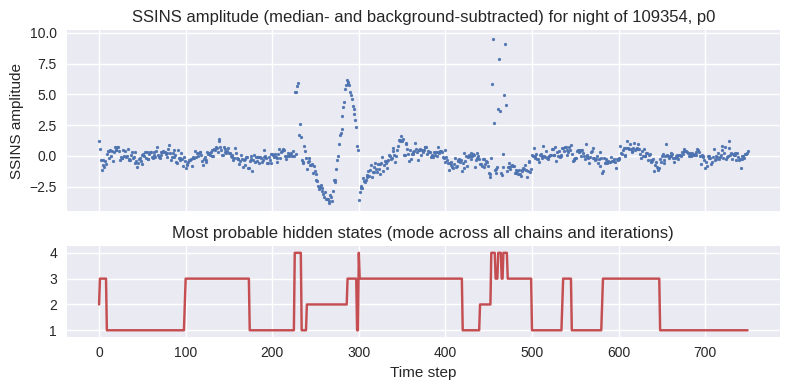

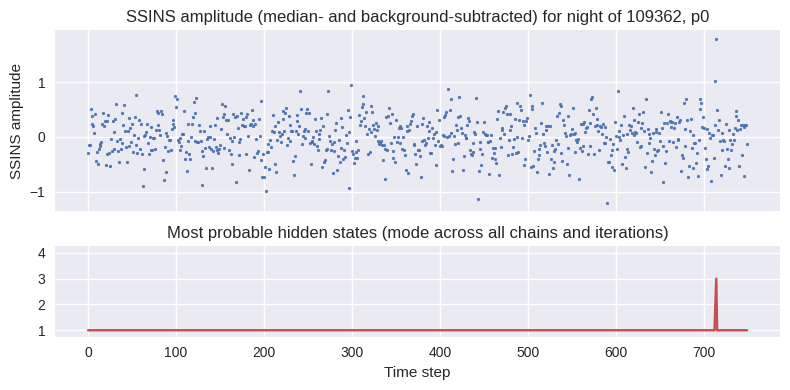

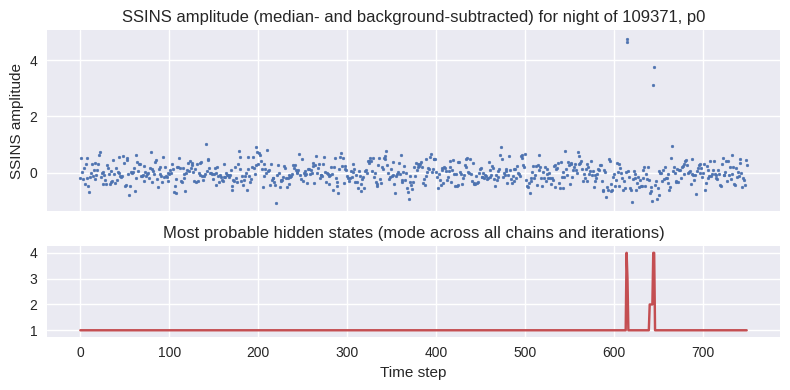

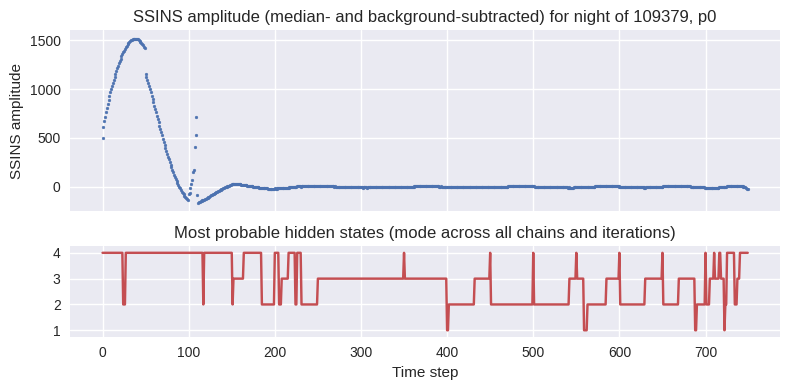

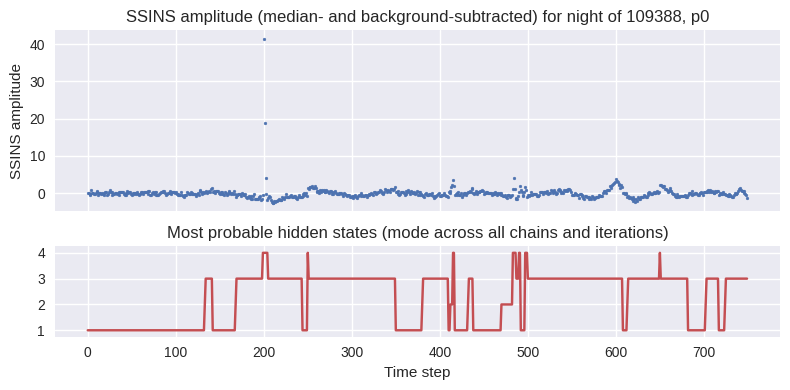

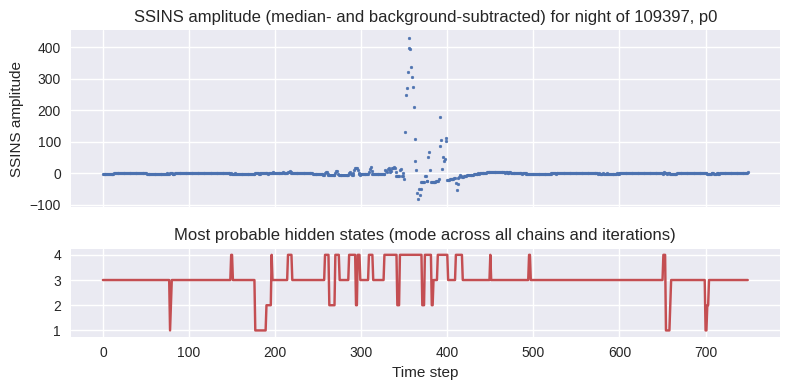

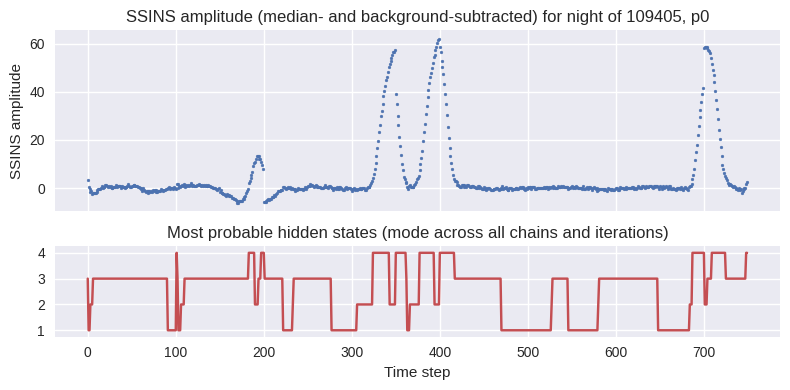

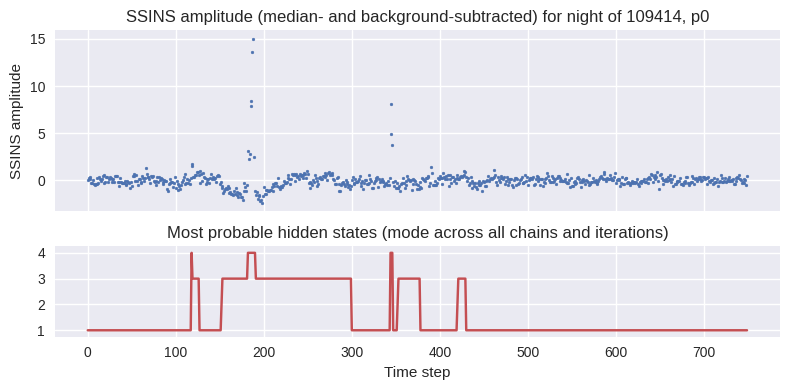

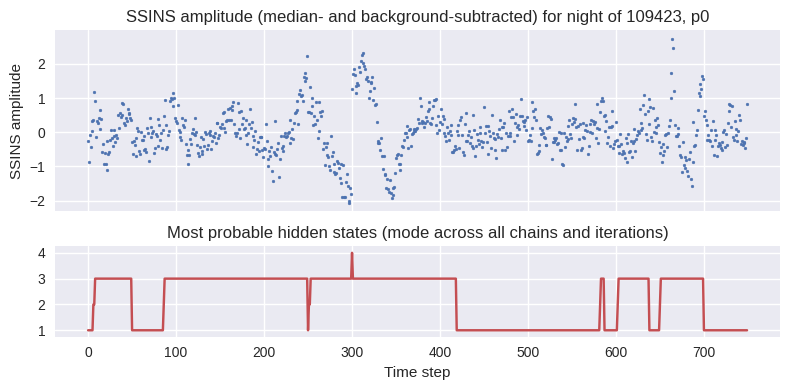

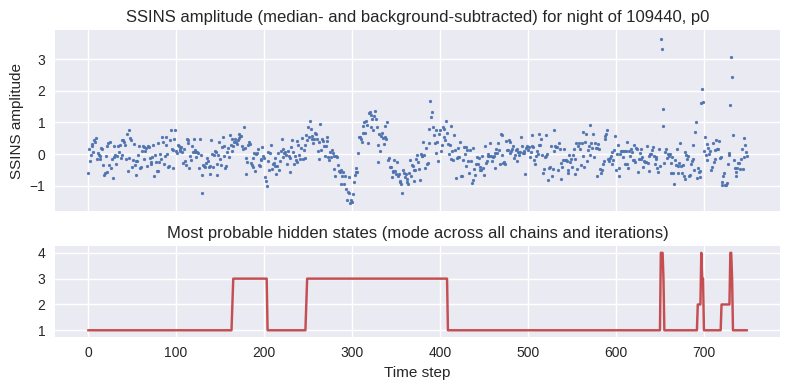

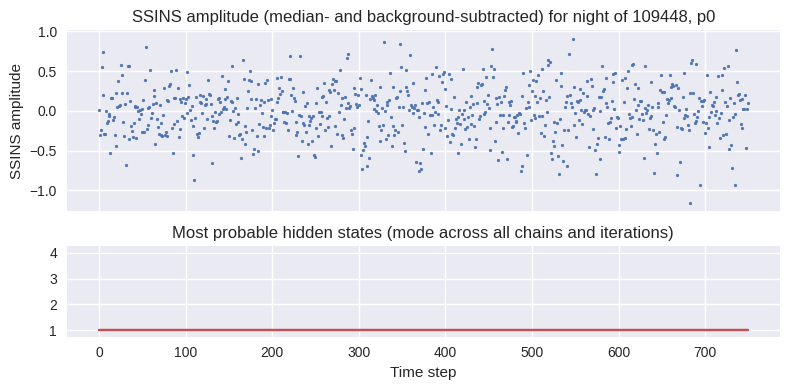

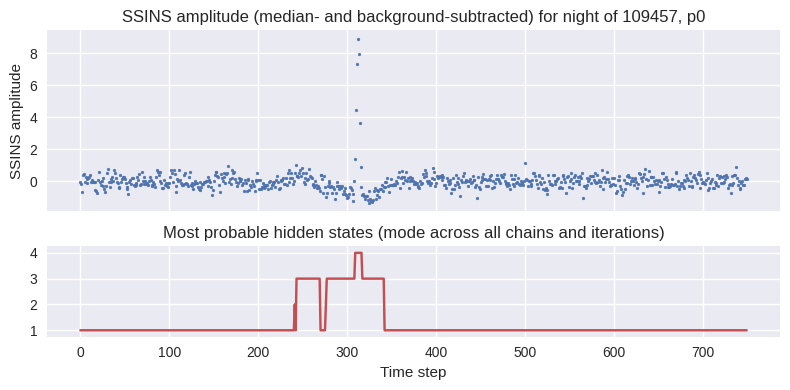

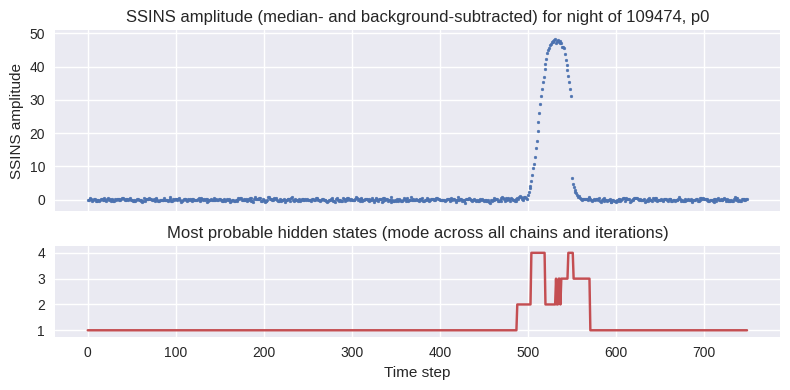

IndexError: list index out of range

In [101]:
importlib.reload(ut)

for i in range(50):
    ut.plot_data_vs_pred(data_dict, fit, pointing='p0', 
            cut_idx=i,
            save_path=None,
    )

/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/python/utils.py:266: SyntaxWarning: invalid escape sequence '\s'
  linestyle='--', color=sns.color_palette()[1],


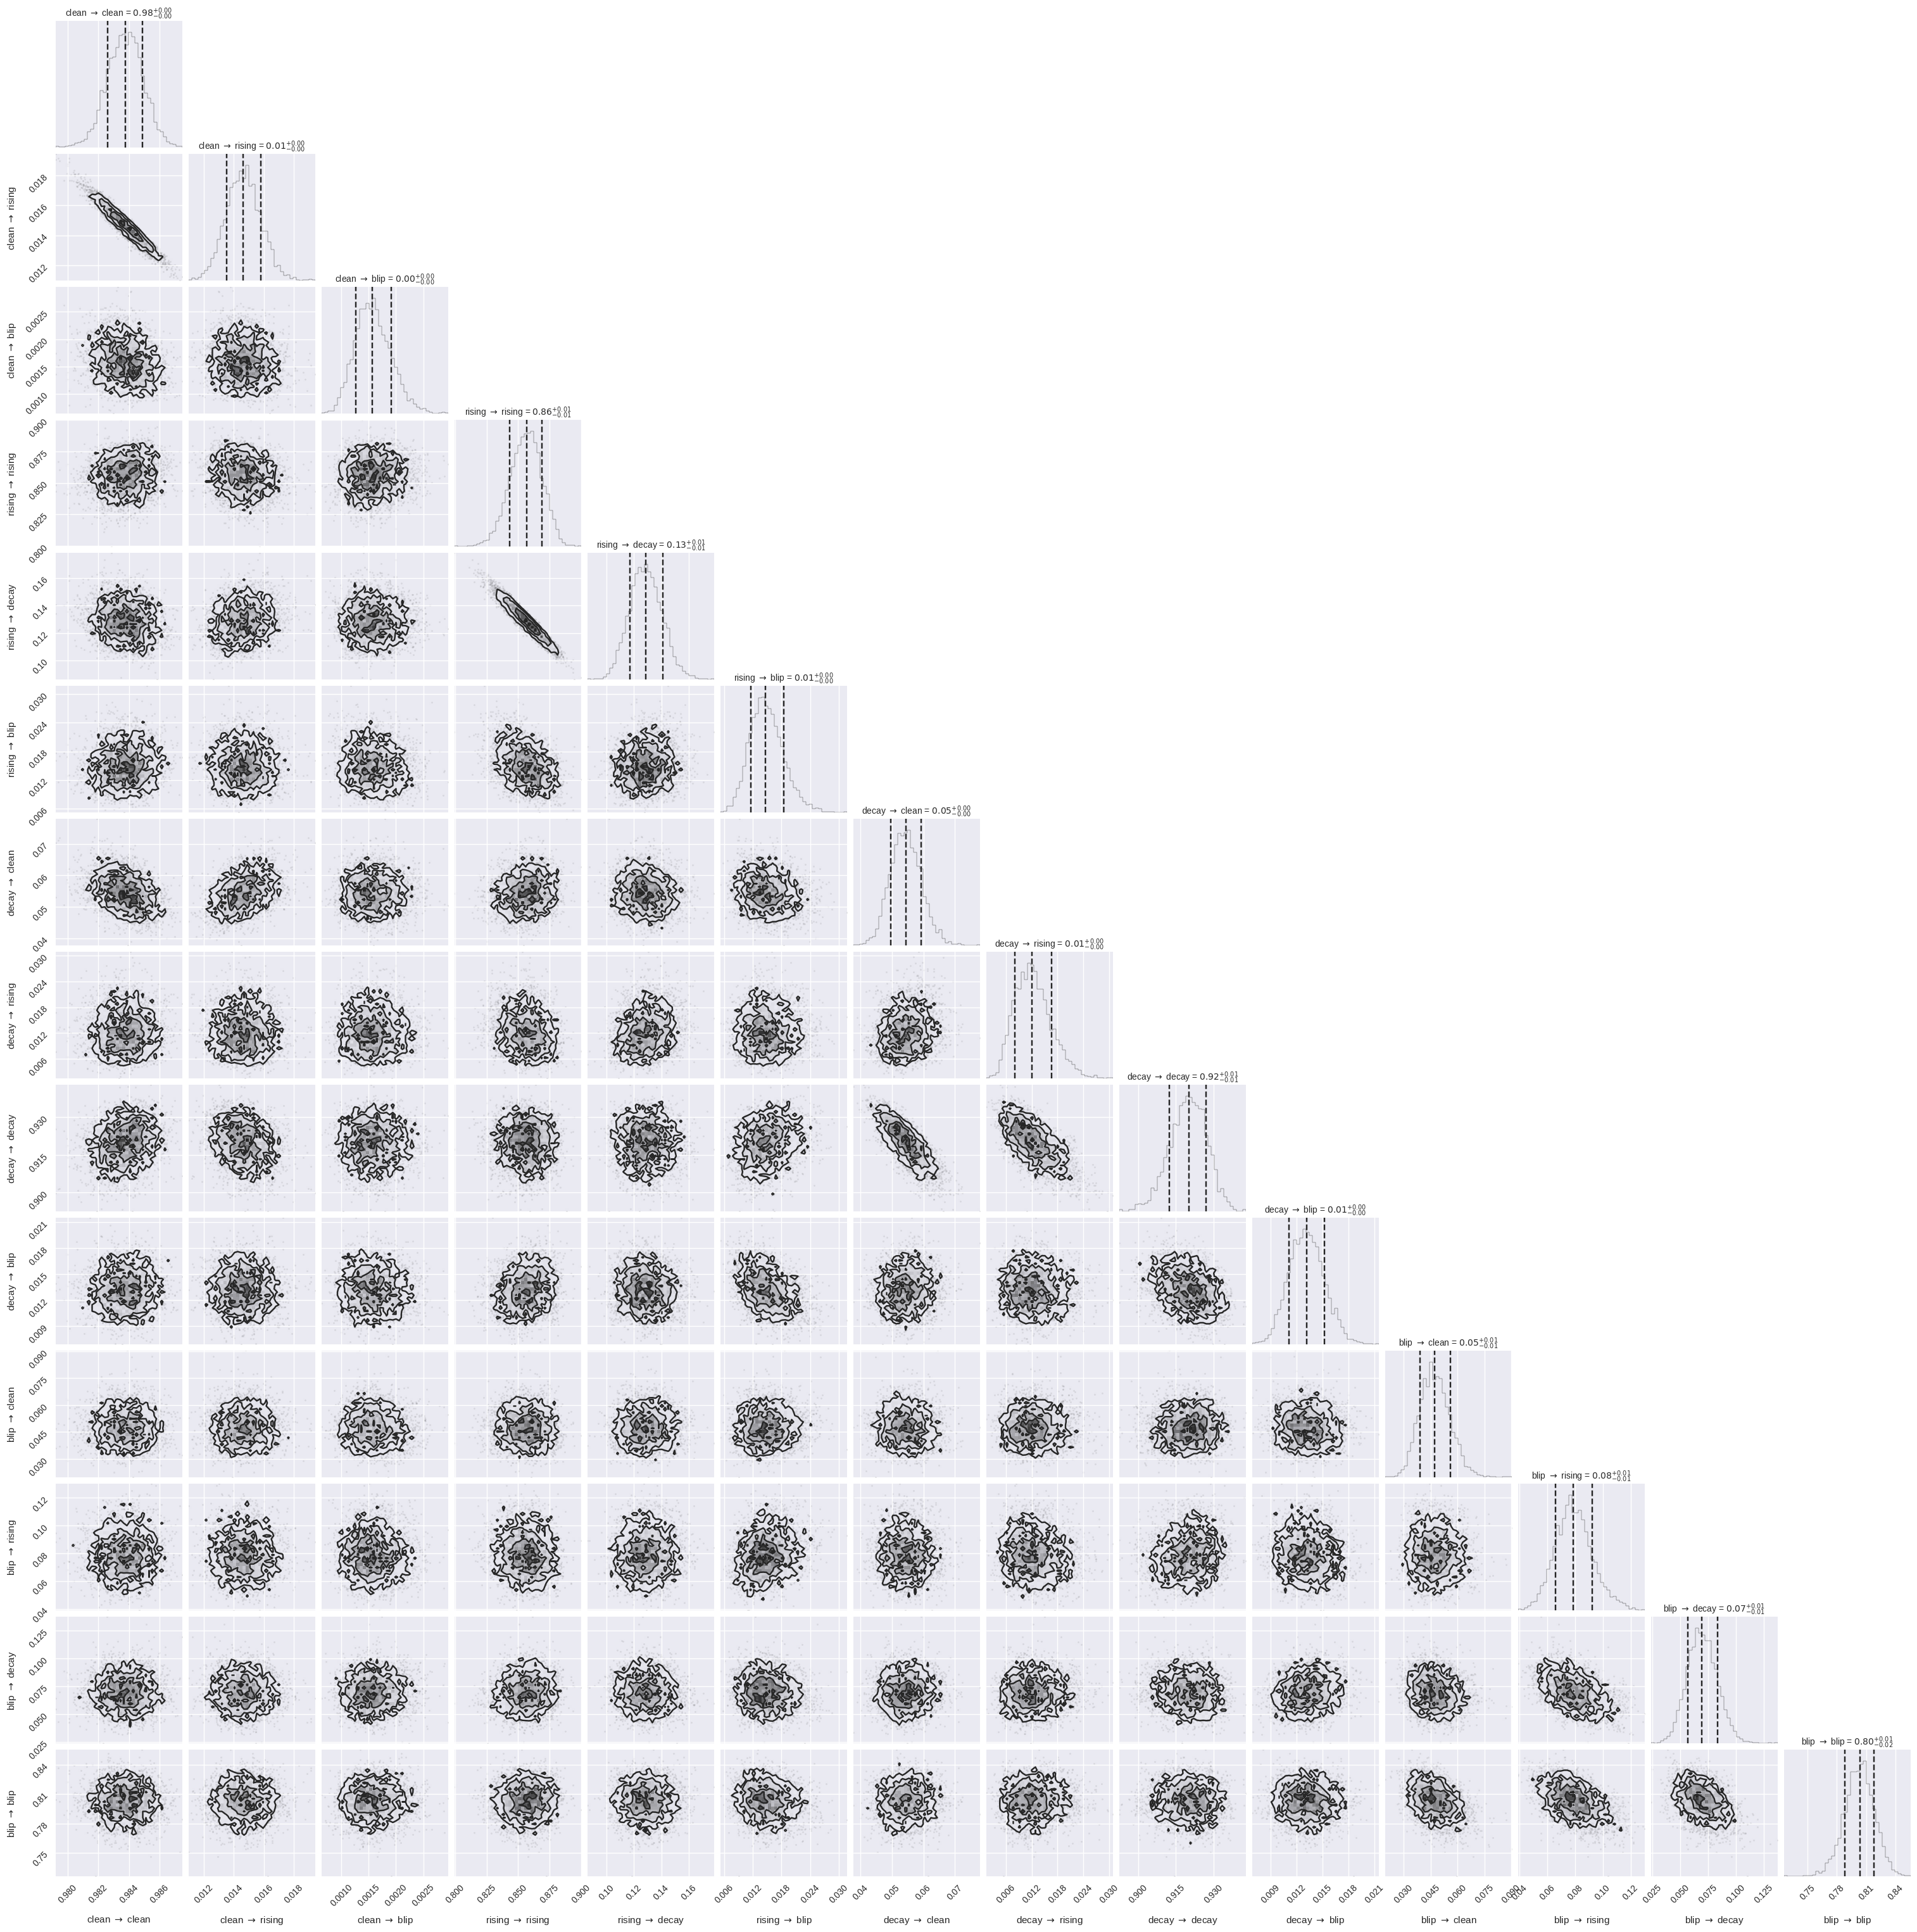

In [11]:
importlib.reload(ut)

ut.transition_corner_plot(fit, save_path=None)

/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/python/utils.py:267: SyntaxWarning: invalid escape sequence '\s'
  linestyle='--', color=sns.color_palette()[1],


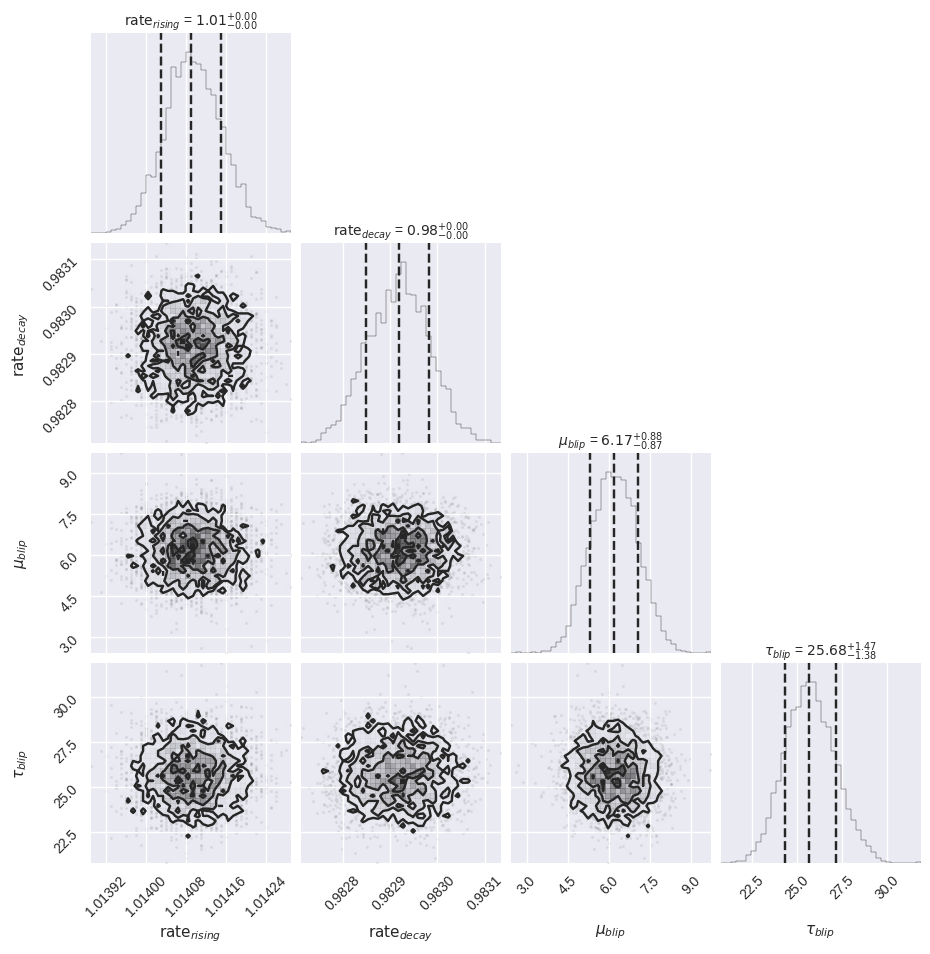

In [14]:
importlib.reload(ut)

ut.emission_corner_plot(fit, save_path=None)

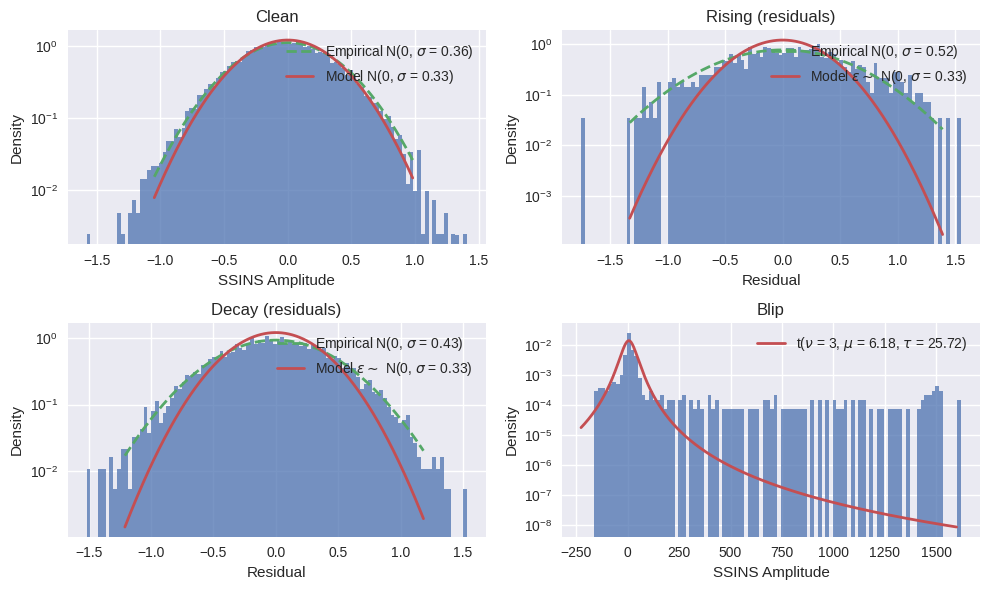

In [15]:
importlib.reload(ut)

ut.plot_prediction_hist(data_dict, fit, save_path=None)

In [57]:
X = fit.stan_variables()['X']      # (4000, 8)
X_mode = mode(X, axis=0).mode

In [63]:
design_matrix = np.asarray(data_dict['A_unsup'])

design_matrix.shape

(21765, 8)

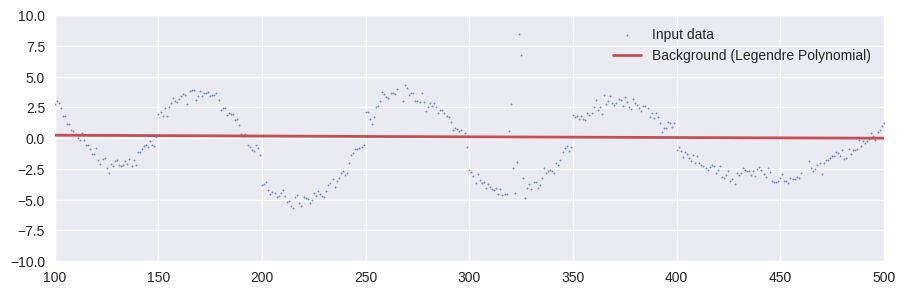

In [99]:
X = fit.stan_variables()['X']            # (draws, L)
A = np.asarray(data_dict['A_unsup'])     # (N, L)
y = np.asarray(data_dict['y_unsup'])     # (N,)

mu_draws = X @ A.T                        # (draws, N)
mu_mean  = mu_draws.mean(axis=0)

plt.figure(figsize=(9, 3))
plt.scatter(np.arange(len(y)), y, s=1, label='Input data', alpha=0.75)
plt.plot(mu_mean, lw=2, label='Background (Legendre Polynomial)', color=sns.color_palette()[2])
plt.legend()
plt.tight_layout()
plt.ylim(-10,10)
plt.xlim(100,500)
plt.show()